In [279]:
import pandas as pd
import re
import os
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.naive_bayes import GaussianNB
path='F:/fall 2022/IST 707/homework/week 8/kaggle_digits'

In [280]:
df=pd.read_csv('F:/fall 2022/IST 707/homework/week 8/kaggle_digits/Kaggle-digit-train.csv').astype(float)

In [161]:
#check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: float64(785)
memory usage: 251.5 MB


In [162]:
#check categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


In [163]:
#check numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

#print('The numerical variables are :', numerical)

There are 785 numerical variables



In [164]:
# check missing values in numerical variables
df[categorical].isnull().sum()

Series([], dtype: float64)

In [165]:
# check missing values in numerical variables
df[numerical].isnull().sum()
#no missing values amoung all features

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [286]:
X = df.drop(['label'], axis=1).astype(float)

y = df['label'].astype(float)

In [287]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB


# split the dataset into train and test data

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Gaussian NB

In [290]:
import time
start = time.time()
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [291]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [292]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [293]:
#prediction on test data
y_pred = gnb.predict(X_test)
print(y_pred)

[1. 8. 1. ... 6. 0. 0.]


In [294]:
acc_score = gnb.score(X_test,y_test)
acc_score

0.5483333333333333

In [295]:
#confusion matrix
from sklearn.metrics import confusion_matrix as CM
CM(y_test,y_pred)

array([[1152,    1,   11,    0,    4,    1,   33,    1,   20,   24],
       [   1, 1341,    2,    5,    0,    0,   10,    0,   29,    7],
       [ 177,   46,  296,  133,    5,    6,  322,    1,  247,   24],
       [ 140,   76,   12,  449,    1,    0,   82,   13,  408,  140],
       [  48,    9,   12,   11,  194,    4,  135,    3,  211,  605],
       [ 228,   36,    5,   24,    7,   44,   80,    2,  574,  111],
       [  15,   29,    2,    0,    2,    3, 1182,    0,   22,    3],
       [   5,    8,    1,   15,    8,    0,    3,  375,   44,  826],
       [  29,  188,    5,   16,    6,    4,   27,    1,  721,  252],
       [   8,   13,    3,    2,   11,    1,    1,   31,   20, 1155]],
      dtype=int64)

In [296]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5544
Test set score: 0.5483


In [297]:
#classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
end = time.time()
print(end - start)

              precision    recall  f1-score   support

         0.0       0.64      0.92      0.76      1247
         1.0       0.77      0.96      0.85      1395
         2.0       0.85      0.24      0.37      1257
         3.0       0.69      0.34      0.45      1321
         4.0       0.82      0.16      0.26      1232
         5.0       0.70      0.04      0.07      1111
         6.0       0.63      0.94      0.75      1258
         7.0       0.88      0.29      0.44      1285
         8.0       0.31      0.58      0.41      1249
         9.0       0.37      0.93      0.53      1245

    accuracy                           0.55     12600
   macro avg       0.66      0.54      0.49     12600
weighted avg       0.67      0.55      0.50     12600

16.925122022628784


# Multinomial NB

In [254]:
import time
start = time.time()
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

In [255]:
#split the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#with normalization
mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [256]:
mnb = MultinomialNB().fit(X_train, y_train)

In [257]:
#prediction on test data
y_pred=mnb.predict(X_test)
print(y_pred)

[1. 5. 2. ... 2. 3. 0.]


In [258]:
#report accuracy
mnb.score(X_test,y_test)

0.8262698412698413

In [259]:
#confusion matrix
from sklearn.metrics import confusion_matrix as CM
CM(y_test,y_pred)

array([[1145,    0,    6,    5,    2,   11,   21,    0,   57,    0],
       [   0, 1313,    5,   11,    0,    5,    5,    0,   55,    1],
       [  17,   13, 1050,   31,   16,    2,   49,   11,   64,    4],
       [   6,   21,   76, 1055,    2,   32,   15,   14,   65,   35],
       [   3,    2,   10,    0,  900,    1,   23,    3,   48,  242],
       [  33,   10,    8,  138,   30,  737,   23,    2,   99,   31],
       [  14,   27,   10,    1,    5,   30, 1156,    0,   15,    0],
       [   5,   22,   11,    7,   22,    0,    2, 1071,   40,  105],
       [   5,   68,   16,   66,   14,   50,   10,    2,  968,   50],
       [  12,   12,    5,   13,   97,    6,    1,   33,   50, 1016]],
      dtype=int64)

In [260]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(mnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(mnb.score(X_test, y_test)))

Training set score: 0.8246
Test set score: 0.8263


In [261]:
#classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
end = time.time()
print(end - start)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1247
         1.0       0.88      0.94      0.91      1395
         2.0       0.88      0.84      0.86      1257
         3.0       0.80      0.80      0.80      1321
         4.0       0.83      0.73      0.78      1232
         5.0       0.84      0.66      0.74      1111
         6.0       0.89      0.92      0.90      1258
         7.0       0.94      0.83      0.88      1285
         8.0       0.66      0.78      0.71      1249
         9.0       0.68      0.82      0.74      1245

    accuracy                           0.83     12600
   macro avg       0.83      0.82      0.82     12600
weighted avg       0.83      0.83      0.83     12600

7.421338796615601


# Multinomial NB with discretization

In [262]:
import time
start = time.time()
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#normalization
mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

#discretization
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=5, encode='onehot').fit(X_train)
X_train_ = kbs.transform(X_train)
X_test_ = kbs.transform(X_test)

In [263]:
mnb = MultinomialNB().fit(X_train_, y_train)

In [264]:
#prediction on test data
y_pred = mnb.predict(X_test_)

print(y_pred)

[1. 5. 2. ... 2. 3. 0.]


In [265]:
#acc score on test data
acc_score = mnb.score(X_test_,y_test)
acc_score

0.8300793650793651

In [266]:
from sklearn.metrics import confusion_matrix as CM
CM(y_test,y_pred)

array([[1133,    0,   14,    7,    3,   52,   19,    2,   17,    0],
       [   0, 1325,   30,    4,    0,   21,    3,    2,   10,    0],
       [  14,   37, 1017,   45,   26,    6,   49,   15,   42,    6],
       [  14,   20,   57, 1019,    3,   80,    9,   15,   76,   28],
       [   2,    6,    6,    0, 1024,    3,   26,    8,   12,  145],
       [  34,   29,   24,  119,   37,  795,   19,   13,   10,   31],
       [  11,   31,   31,    2,   26,   38, 1115,    0,    4,    0],
       [   8,   26,   35,    3,   27,    5,    0, 1087,   12,   82],
       [   8,   55,   20,   83,   16,   48,    9,    6,  964,   40],
       [  13,   21,   13,   17,  106,   16,    8,   48,   23,  980]],
      dtype=int64)

In [267]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(mnb.score(X_train_, y_train)))
print('Test set score: {:.4f}'.format(mnb.score(X_test_, y_test)))

Training set score: 0.8229
Test set score: 0.8301


In [268]:
#classification reports
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      1247
         1.0       0.85      0.95      0.90      1395
         2.0       0.82      0.81      0.81      1257
         3.0       0.78      0.77      0.78      1321
         4.0       0.81      0.83      0.82      1232
         5.0       0.75      0.72      0.73      1111
         6.0       0.89      0.89      0.89      1258
         7.0       0.91      0.85      0.88      1285
         8.0       0.82      0.77      0.80      1249
         9.0       0.75      0.79      0.77      1245

    accuracy                           0.83     12600
   macro avg       0.83      0.83      0.83     12600
weighted avg       0.83      0.83      0.83     12600



In [269]:
end = time.time()
print(end - start)

8.973556756973267


# Learning curves on GNB, DTC when cv=3

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import learning_curve

32.86626386642456


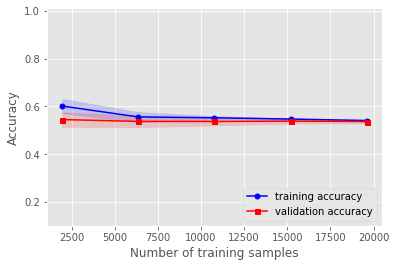

In [301]:
#split the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#GNB
import time
start = time.time()

pipe_gnb = make_pipeline(StandardScaler(), GaussianNB())

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_gnb, X=X_train, y=y_train, cv=3,n_jobs=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths(GNB)
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.1, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)

26.879809379577637


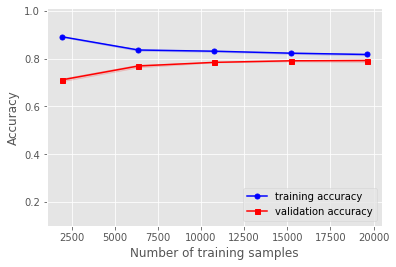

In [302]:
#Decision Tree

#split the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#Decision Tree
import time
start = time.time()
pipe_dtc = make_pipeline(StandardScaler(), DTC(criterion='entropy', max_depth=7, min_samples_split=3))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_dtc, X=X_train, y=y_train, cv=3,n_jobs=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths(DecisionTree)
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.1, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)

6.763206720352173


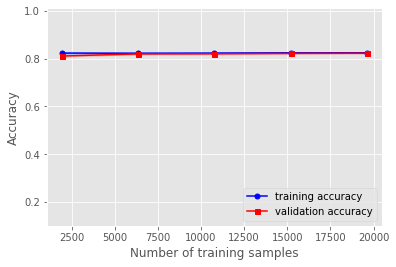

In [303]:
#split the data
X = df.drop(['label'], axis=1).astype(float)
y = df['label'].astype(float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#MNB
import time
start = time.time()

pipe_mnb = make_pipeline(MinMaxScaler(), MultinomialNB())

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_mnb, X=X_train, y=y_train, cv=3,n_jobs=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# learning curve with bandwidths(GNB)
plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='red', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,
                 test_mean-test_std, alpha=0.15, color='red')

plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.1, 1.01])
plt.savefig('te.png', dpi=1000)

end = time.time()
print(end - start)